In [1]:
## importing dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input = "In the town of Athy one Jeremy Lanigan\n Battered away til he hadnt a pound.\n His father died and made him a man again\n Left him a farm and ten acres of ground.\n He gave a grand party for friends and relations\n Who didnt forget him when come to the wall,\n And if youll but listen Ill make your eyes glisten\n Of the rows and the ructions of Lanigan’s Ball.\n Myself to be sure got free invitation,\n For all the nice girls and boys I might ask,\n And just in a minute both friends and relations\n Were dancing round merry as bees round a cask.\n Judy ODaly, that nice little milliner,\n She tipped me a wink for to give her a call,\n And I soon arrived with Peggy McGilligan\n Just in time for Lanigans Ball."

In [3]:
tokenizer = Tokenizer()
corpus = input.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(total_words)

97


In [4]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
print(input_sequences[:5])

[[6, 3], [6, 3, 17], [6, 3, 17, 4], [6, 3, 17, 4, 18], [6, 3, 17, 4, 18, 19]]


In [5]:
print(pad_sequences(input_sequences[:10]))

[[ 0  0  0  0  0  0  6  3]
 [ 0  0  0  0  0  6  3 17]
 [ 0  0  0  0  6  3 17  4]
 [ 0  0  0  6  3 17  4 18]
 [ 0  0  6  3 17  4 18 19]
 [ 0  6  3 17  4 18 19 20]
 [ 6  3 17  4 18 19 20 21]
 [ 0  0  0  0  0  0 22 23]
 [ 0  0  0  0  0 22 23 24]
 [ 0  0  0  0 22 23 24  9]]


In [6]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)

[[ 0  0  0 ...  0  6  3]
 [ 0  0  0 ...  6  3 17]
 [ 0  0  0 ...  3 17  4]
 ...
 [ 0  0  0 ...  6 95  5]
 [ 0  0  0 ... 95  5 96]
 [ 0  0  0 ...  5 96 12]]


In [7]:
## spliting to featue and labels
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

In [8]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


## Creating the model

In [9]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words,8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(xs, ys, epochs=1500, verbose=1)

Epoch 1/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0148 - loss: 4.5749
Epoch 2/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0823 - loss: 4.5705
Epoch 3/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0675 - loss: 4.5683
Epoch 4/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0613 - loss: 4.5647
Epoch 5/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0623 - loss: 4.5618
Epoch 6/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0633 - loss: 4.5551
Epoch 7/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0696 - loss: 4.5497
Epoch 8/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0508 - loss: 4.5485    
Epoch 9/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0738 - loss: 4.5335
Epoch 10/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0602 - loss: 4.5337
Epoch 11/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0602 - loss: 4.5206
Epoch 12/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accur

In [12]:
## Creating function to display the graph
def plot_graph(fitted_history):
  epochs = range(1, len(fitted_history.history['accuracy']) + 1)
  plt.figure(figsize=(10,6))
  plt.plot(epochs, fitted_history.history['accuracy'])
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.show()

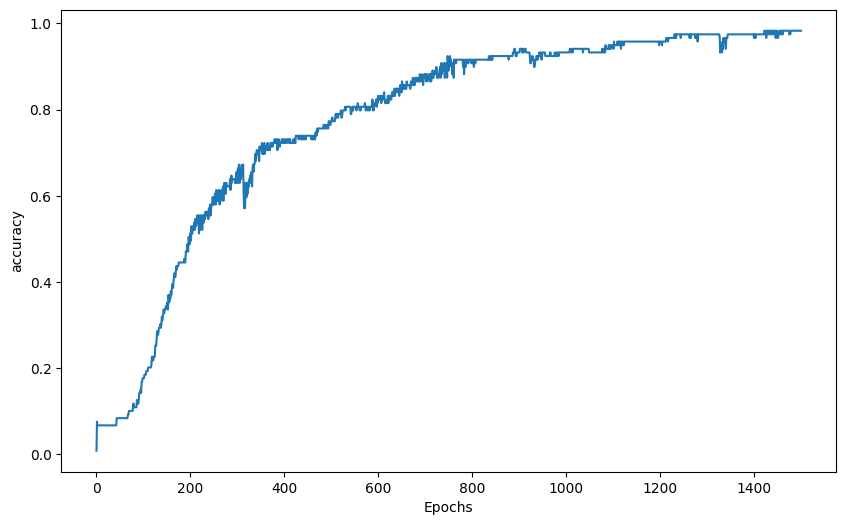

In [13]:
plot_graph(history)

## Predicting Text

In [14]:
seed_text = "in the town of athy"

In [15]:
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
[19]


In [16]:
for word, index in tokenizer.word_index.items():
  if index == predicted:
    print(word)
    break

one


## compounding predictions to generate text

In [17]:
seed_text = "sweet jeremy saw dublin"
next_words = 10
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
  predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word += word
      break
  seed_text += " " + output_word
print(seed_text)

sweet jeremy saw dublin away til he hadnt a pound pound cask cask cask


## Extending the Dataset

In [18]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

--2025-07-26 17:55:11--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt’

irish-lyrics-eof.tx 100%[===================>]  67.35K   327KB/s    in 0.2s    

2025-07-26 17:55:12 (327 KB/s) - ‘irish-lyrics-eof.txt’ saved [68970/68970]



In [19]:
data = open('/content/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

## Changing model Architecture

In [21]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words,8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1, return_sequences="True")))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model.fit(xs, ys, epochs=400, verbose=1)

Epoch 1/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0435 - loss: 7.1698
Epoch 2/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0658 - loss: 6.4091
Epoch 3/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0650 - loss: 6.2818
Epoch 4/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0639 - loss: 6.2117
Epoch 5/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0699 - loss: 6.1173
Epoch 6/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0718 - loss: 6.0696
Epoch 7/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0800 - loss: 6.0057
Epoch 8/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0774 - loss: 5.9474
Epoch 9/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0811 - loss: 5.9281
Epoch 10/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0873 - loss: 5.8694
Epoch 11/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0800 - loss: 5.8220
Epoch 12/400
377/377 ━━━━━━━━━

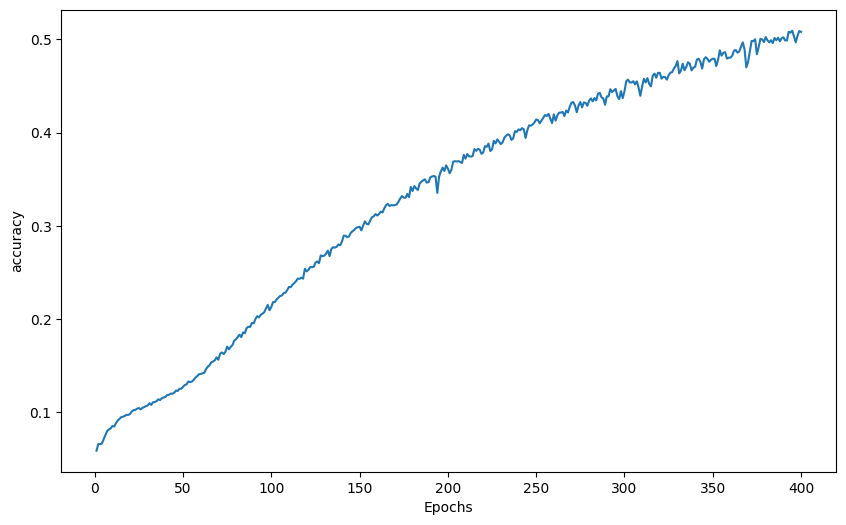

In [22]:
plot_graph(history1)

In [23]:
seed_text = "sweet jeremy saw dublin"
next_words = 10
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
  predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word += word
      break
  seed_text += " " + output_word
print(seed_text)

sweet jeremy saw dublin companions may sweet bone thats rude and forgiveness till parting


## Improving the Data

In [24]:
window_size = 6
sentences = []
alltext = []
data = open('/content/irish-lyrics-eof.txt').read()
corpus = data.lower()
words = corpus.split(" ")
range_size = len(words) - max_sequence_len
for i in range (0, window_size-1):
  this_sentences = ""
  word = words[i+window_size]
  this_sentences += word
  this_sentences += " "
  sentences.append(this_sentences)

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index)+1

input_sequences = []
for line in sentences:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [26]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(tf.keras.layers.Embedding(total_words,16))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences="True")))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.00003,beta_1=0.90, beta_2=0.999, amsgrad=False),
              metrics=['accuracy'])

history1 = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 1.9452
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.0000e+00 - loss: 1.9451
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0000e+00 - loss: 1.9450
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 1.9448
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 1.9447
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.9446
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 1.9444
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 1.9443
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 1.9442
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 1.9440
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 1.9439
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 

In [ ]:
seed_text = "sweet jeremy saw dublin"
next_words = 10
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
  predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word += word
      break
  seed_text += " " + output_word
print(seed_text)